## FINAL PROJECT

#### Coralia, Silvia, Meli and Luis

# **PREDICTION OF POTENCIAL CREDIT CARD DEFAULT**

<img src="credit_debtor.jpg">

# **Import libraries**

In [297]:
# import the necessary packages
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
import math
import numpy as np

import seaborn as sns
sns.set_theme(style="white")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":25,"axes.labelsize":20})   

import sklearn

pd.set_option('display.max_columns', 90) # by default 10, pandas will display all columns
pd.set_option('display.max_rows', 15) # by default 10, pandas will display all rows

In [298]:
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

import pickle

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier

from sklearn import metrics

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score


# **Upload data**

In [299]:
# 1.Upload data
df = pd.read_csv('train.csv')
#test = pd.read_csv('test.csv')
#review the shape
df = df[~df['X2'].str.contains('SEX')]
print(df.shape)

(23999, 25)


### Drop unused column

In [300]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,50000,2,2,2,26,1,2,2,0,0,0,50867,51486,48869,30115,29527,29998,1710,136,1206,2002,2005,3003,0
1,180000,2,5,1,44,0,0,-1,-1,-1,-1,20916,0,850,0,6881,10340,0,850,0,6881,10340,182,0
2,270000,2,2,1,56,0,0,0,0,0,0,137807,123769,104377,106651,109294,101151,5000,5000,3953,4500,4000,3900,0
3,80000,2,2,2,25,1,2,0,0,0,0,78894,79989,79882,67946,51435,53113,3000,3500,5000,2500,2500,2000,0
4,100000,2,2,1,28,2,0,0,0,0,2,73073,74739,70844,63924,57326,59654,3500,3003,1910,2400,3300,0,1


### There are no null values

In [301]:
df.isnull().sum().head()

X1    0
X2    0
X3    0
X4    0
X5    0
dtype: int64

### All columns are strings

In [302]:
pd.options.display.max_rows =None
df.dtypes.head(5)

# All variables are in string format

X1    object
X2    object
X3    object
X4    object
X5    object
dtype: object

### Convert all columns to numeric

In [303]:
cols = df.columns
df[cols] = df[cols].apply(pd.to_numeric)

# <b>FEATURES</b>

### This study reviewed the literature and used the following 23 variables as explanatory variables for default payment of credit card debtors:

### <b>X1:</b>  <b>Amount of the given credit (NT dollar):</b> it includes both the individual consumer credit and his/her family (supplementary) credit.
### <b>X2:</b> <b>Gender</b> (1 = male; 2 = female).
### <b>X3:</b> <b>Education</b> (1 = graduate school; 2 = university; 3 = high school; 4 = others).
### <b>X4:</b> <b>Marital status</b> (1 = married; 2 = single; 3 = others).
### <b>X5:</b> <b>Age (year).</b>
### <b>X6: - X11:</b> <b>History of past payment.</b> We tracked the past monthly payment records (from April to September, 2005) as follows: 
####     X6 = the repayment status in September, 2005;
####     X7 = the repayment status in August, 2005;
####     . . .
####     X11 = the repayment status in April, 2005.
### The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
### <b>X12-X17: Amount of bill statement (NT dollar).</b>
####     X12 = amount of bill statement in September, 2005;
####     X13 = amount of bill statement in August, 2005;
####     . . .;
####     X17 = amount of bill statement in April, 2005.
### <b>X18-X23: Amount of previous payment (NT dollar).</b>
####     X18: = amount paid in September, 2005;
####     X19 = amount paid in August, 2005;
####     . . .;
####     X23 = amount paid in April, 2005.
                  
                

# <b>TARGET</b>

## **Y - Payment default next month.**
### This research employed a binary variable, default payment (Yes = 1, No = 0), as the target variable.


# Review of features

## **X1 - Amount of credit given (NT$ New Taiwanese dollar)**

## *1 USD = 27,66 NTD*

In [304]:
df['X1'].describe()

count      23999.000000
mean      167106.379432
std       129733.819341
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: X1, dtype: float64

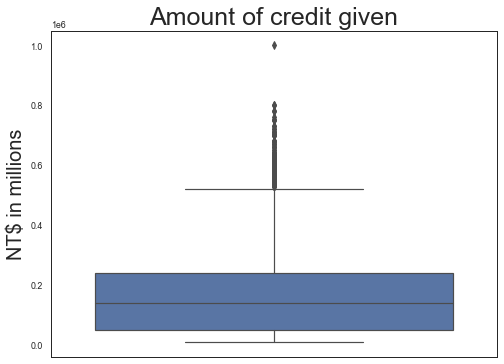

In [305]:
fig, ax = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(6)
ax = sns.boxplot(y=df['X1']);
ax.set_title('Amount of credit given');
ax.set_ylabel('NT$ in millions');

### Remove outliers from X1

In [306]:
  
# First quartile (Q1)
Q1 = np.percentile(df['X1'], 25, interpolation = 'midpoint')
# Third quartile (Q3)
Q3 = np.percentile(df['X1'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

lower = Q1 - 1.5*(IQR)
upper = Q3 + 1.5 *(IQR)

#df[df['SALE PRICE']>upper].sort_values('SALE PRICE', ascending=False).loc[:,'SALE PRICE'].shape[0]
#df[df['SALE PRICE']<lower].sort_values('SALE PRICE', ascending=True)

print("Lower outlier limit:", lower)
print("Upper outlier limit:", upper)

#Remove upper outliers

df=df.drop(df[(df['X1']>upper)].index)

Lower outlier limit: -235000.0
Upper outlier limit: 525000.0


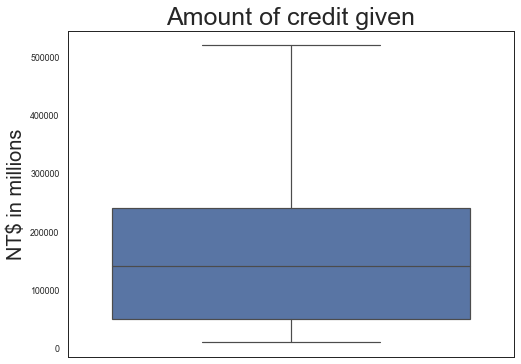

In [307]:
fig, ax = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(6)
ax = sns.boxplot(y=df['X1'])
ax.set_title('Amount of credit given')
ax.set_ylabel('NT$ in millions');

In [308]:
df['X1'].describe()

count     23863.000000
mean     164532.791351
std      125409.252452
min       10000.000000
25%       50000.000000
50%      140000.000000
75%      240000.000000
max      520000.000000
Name: X1, dtype: float64

## **X2 - Gender**

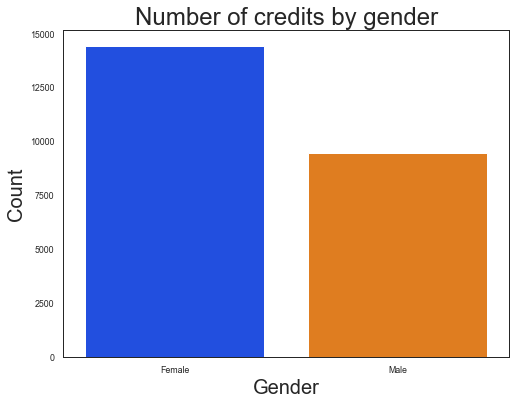

In [309]:
fig, ax = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(6)
sns.set(font_scale = 2)
ax = sns.countplot(data=df.replace({1:'Male', 2:'Female'}), x='X2', palette=sns.color_palette('bright'))
ax.set_title('Number of credits by gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Count');

## **X3 - Education**

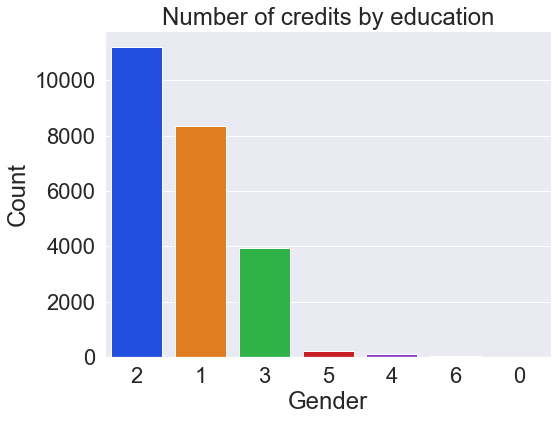

In [310]:
fig, ax = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(6)
sns.set(font_scale = 2)
ax = sns.countplot(data=df,
                   x='X3',order = df['X3'].value_counts().index, palette=sns.color_palette('bright'));
ax.set_title('Number of credits by education')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
plt.show()

## **X4 - Marital status**

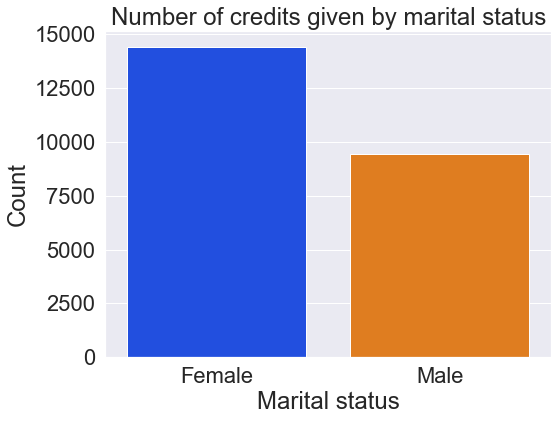

In [311]:
fig, ax = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(6)
sns.set(font_scale = 2)
sns.countplot(data=df.replace({1: "Male", 2: "Female"}) , x='X2', palette=sns.color_palette('bright'))
ax.set_title('Number of credits given by marital status')
ax.set_xlabel('Marital status')
ax.set_ylabel('Count')
plt.show()

## **X5 - Age**

In [312]:
df['X5'] = pd.to_numeric(df['X5'])
df['X5'].dtypes

dtype('int64')

In [313]:
df['X5'].describe()

count    23863.000000
mean        35.479780
std          9.220735
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: X5, dtype: float64

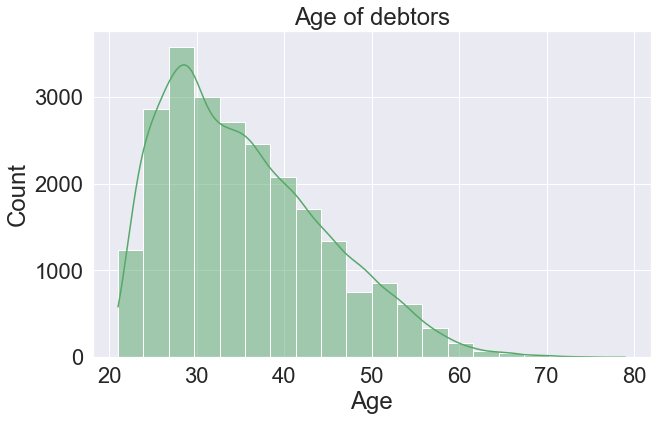

In [314]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(6)
sns.set(font_scale = 2)
ax = sns.histplot(data=df, x='X5', bins=20, kde=True, color='g')
ax.set_title('Age of debtors')
ax.set_xlabel('Age');
ax.set_ylabel('Count');

### <b>X6: - X23:</b> <b>History of past payment.</b>

In [315]:
df['X12'].describe()

count     23863.000000
mean      50624.884633
std       71776.376956
min     -165580.000000
25%        3526.500000
50%       22358.000000
75%       67054.000000
max      626648.000000
Name: X12, dtype: float64

In [316]:
df = df[df['X12']>0]
df['X12'].describe()

count     21782.000000
mean      55490.092416
std       73281.662359
min           1.000000
25%        6902.000000
50%       27784.500000
75%       74032.750000
max      626648.000000
Name: X12, dtype: float64

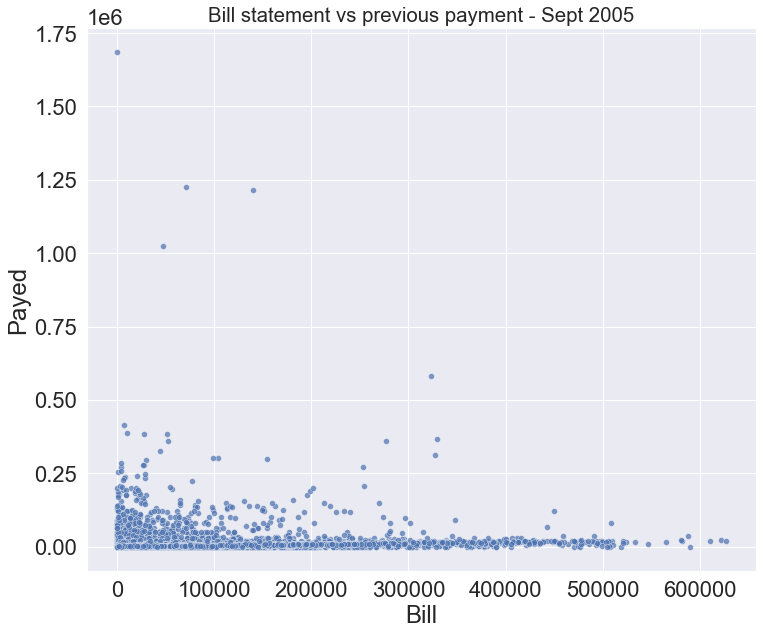

In [317]:
fig, ax = plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(10)
sns.set(font_scale = 1.7)
ax = sns.scatterplot(data=df, x='X12', y='X19', alpha=0.7)
ax.set_title('Bill statement vs previous payment - Sept 2005')
ax.set_xlabel('Bill')
ax.set_ylabel('Payed');

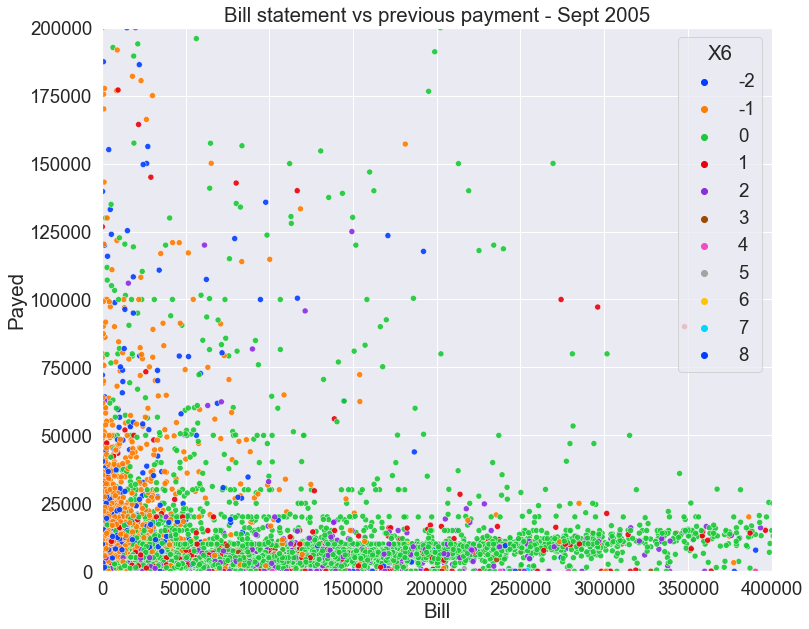

In [318]:
fig, ax = plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(10)
sns.set(font_scale = 1.7)
plt.xlim([0,400000])
plt.ylim([0,200000])
ax = sns.scatterplot(data=df, x='X12', y='X19', hue='X6', alpha=0.9, palette="bright")
ax.set_title('Bill statement vs previous payment - Sept 2005')
ax.set_xlabel('Bill')
ax.set_ylabel('Payed');

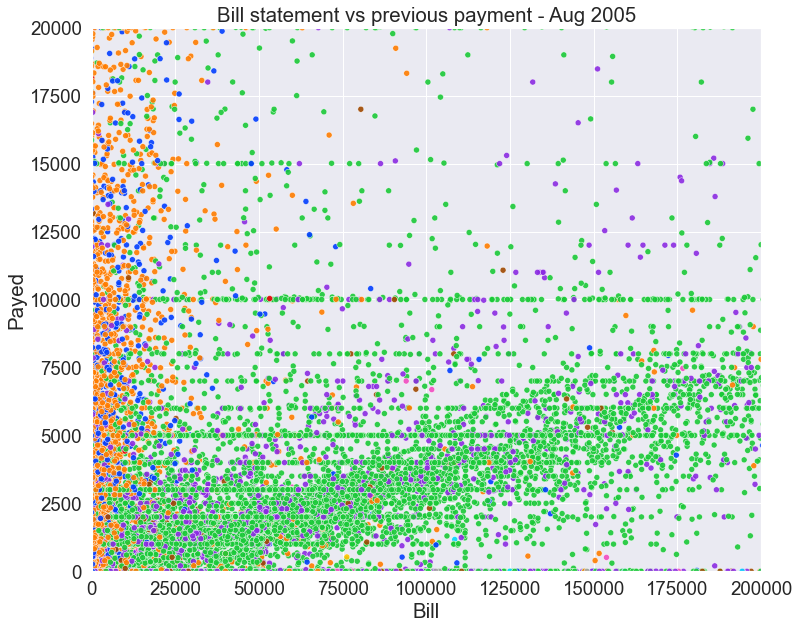

In [319]:
fig, ax = plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(10)
sns.set(font_scale = 1.7)
plt.xlim([0,200000])
plt.ylim([0,20000])
ax = sns.scatterplot(data=df, x='X13', y='X20', hue='X7', alpha=.9, palette="bright", legend=False)
ax.set_title('Bill statement vs previous payment - Aug 2005')
ax.set_xlabel('Bill')
ax.set_ylabel('Payed');

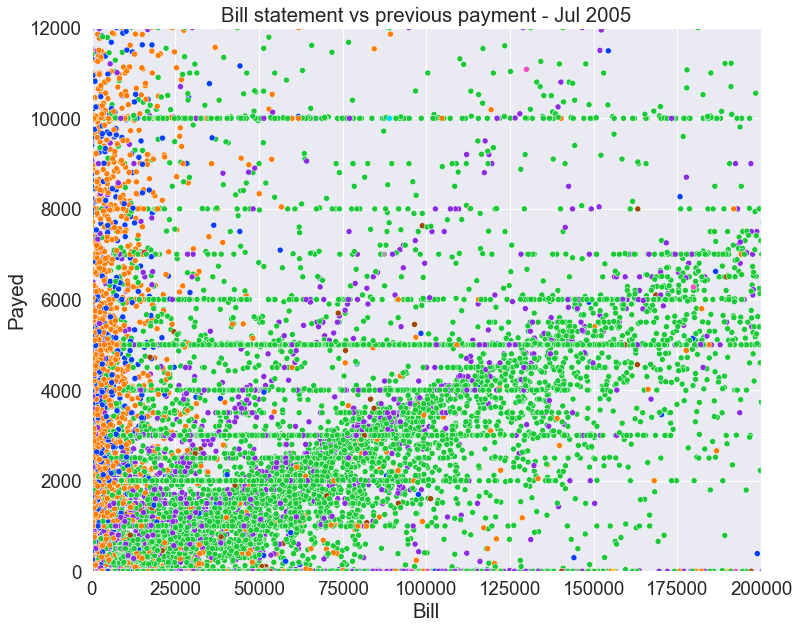

In [320]:
fig, ax = plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(10)
sns.set(font_scale = 1.7)
plt.xlim([0,200000])
plt.ylim([0,12000])
ax = sns.scatterplot(data=df, x='X14', y='X21', hue='X8', alpha=1, palette="bright", legend=False)
ax.set_title('Bill statement vs previous payment - Jul 2005')
ax.set_xlabel('Bill')
ax.set_ylabel('Payed');

# #1 Baseline model

In [321]:
#Baseline
df['Y'].value_counts()

0    17013
1     4769
Name: Y, dtype: int64

In [322]:
y_preds_base = [0 for x in range(len(df))]
base_cm = confusion_matrix(df.Y, y_preds_base)

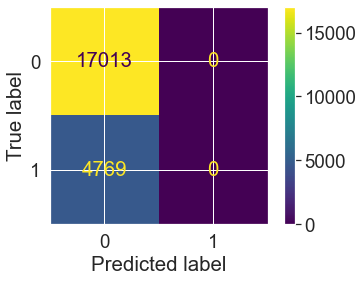

In [323]:
base_cm #ConfusionMatrixDisplay(confusion_matrix = base_cm)
disp = ConfusionMatrixDisplay(confusion_matrix = base_cm)
disp.plot();

In [324]:
print(classification_report(df.Y, y_preds_base, zero_division=1));

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     17013
           1       1.00      0.00      0.00      4769

    accuracy                           0.78     21782
   macro avg       0.89      0.50      0.44     21782
weighted avg       0.83      0.78      0.69     21782



## Train / validation datasets

In [325]:
X = df.drop('Y',axis=1)
y = df['Y']
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
#X_Real = test.drop('Y') #test for kaggle

print(y_val.head(10))

20334    0
5745     0
7778     0
21761    0
19761    0
17182    0
7416     1
17962    1
14728    0
20885    0
Name: Y, dtype: int64


# #2 Heuristic model

### ***To do list***
#

In [326]:
names_numeric=x_train.describe().columns
#names_categorical=x_train.describe(exclude='number').columns

# 3.Data Preprocessing LinearRegression()
## Pipeline auxiliary function work with the different data types
numerical = names_numeric
#Ordinal Encoder
#ordinal_p = Pipeline([
    #("imputer", SimpleImputer(strategy='most_frequent')),
    #("encoder", OrdinalEncoder()),
#])
#Nominal Encoder
#nominal_p = Pipeline([
    #("imputer", SimpleImputer(strategy='most_frequent')),
    #("encoder", OneHotEncoder(handle_unknown='ignore'))
#])
#Numerical Scaling
numerical_p = Pipeline([
    ("imputer" , SimpleImputer(strategy='mean')), #median is the default strategy we can change to mean
    ("scaler", StandardScaler())
])

#Final Pipeline
preprocessing_pipeline = ColumnTransformer([
    #("nominal_prep", nominal_p, nominal),
    #("ordinal_prep", ordinal_p, ordinal),
    ("numerical_prep", numerical_p, numerical)
])

# #3 Logistic regression

In [327]:
#Complete Pipeline
ML_model = LogisticRegression(max_iter=1000000)

complete_pipeline_linear = Pipeline([('preprocessor',preprocessing_pipeline), ('model',ML_model)])

In [ ]:
#GridSearch
# Create param grid to hyper parameter tune the model
param_grid = {
    "preprocessor__numerical_prep__imputer__strategy": ["mean", "median", "most_frequent"], # adjust the strategy for imputation
    'model__C':[1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1],
    'model__max_iter':[1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1],
}

grid_linear = GridSearchCV(complete_pipeline_linear, # Model
                    param_grid=param_grid, # Parameters to tune
                    cv=5, # Cross Validation
                    verbose=2, # Shows output while training 
                    n_jobs=-1 # How many core to use on your computer (-1 means use all cores)
                   )
from warnings import filterwarnings
filterwarnings('ignore')

In [329]:
#Prediction and Evaluation

grid_linear.fit(x_train, y_train)

y_pred = grid_linear.best_estimator_.predict(x_val)

print('Train')
print('Accuracy:',grid_linear.best_estimator_.score(x_train,y_train))

print('Val')
print('Accuracy:',grid_linear.best_estimator_.score(x_val,y_val))
print('Precision:',precision_score(y_val, y_pred, average='binary'))
print('Recall:',recall_score(y_val, y_pred, average='binary'))
print('F1-Score:',f1_score(y_val, y_pred, average='binary'))

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Train
Accuracy: 0.7918507890961263
Val
Accuracy: 0.7938948817994033
Precision: 0.5126582278481012
Recall: 0.527114967462039
F1-Score: 0.5197860962566844


/home/lfleiva/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# #4 Random forest

In [330]:
#Complete Pipeline
ML_model = RandomForestClassifier(n_estimators=500, max_depth=9, random_state=0)
complete_pipeline_random = Pipeline([('preprocessor',preprocessing_pipeline), ('model',ML_model)])

In [331]:
# Categorical
param_grid2 = {
    "model__n_estimators": [5,6,10,20,30,60,90,100,300,500], # how many trees in our forest
    "model__max_depth": [2,4,6]
    
}
grid_random = GridSearchCV(
    complete_pipeline_random ,
    param_grid2,
    cv = 5,
    n_jobs=-1,
    verbose=1)

In [332]:
# Prediction and Evaluation 

grid_random.fit(x_train, y_train)

y_pred = grid_random.best_estimator_.predict(x_val)

print('Train')
print('Accuracy:',grid_random.best_estimator_.score(x_train,y_train))

print('Val')
print('Accuracy:',grid_random.best_estimator_.score(x_val,y_val))
print('Precision:',precision_score(y_val, y_pred, average='binary'))
print('Recall:',recall_score(y_val, y_pred, average='binary'))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Train
Accuracy: 0.8352367288378766
Val
Accuracy: 0.8271746614643103
Precision: 0.6522522522522523
Recall: 0.3926247288503254


# #5 ExtraTreesClassifier

In [333]:
#Complete Pipeline
ML_model = ExtraTreesClassifier()

complete_pipeline_erandom = Pipeline([('preprocessor',preprocessing_pipeline), ('model',ML_model)])

In [334]:
# Categorical
param_grid2 = {
    "model__n_estimators": [5,6,10,20,30,60,90,100,300,500], # how many trees in our forest
    "model__max_depth": [2,4,6]
    
}
grid_erandom = GridSearchCV(
    complete_pipeline_erandom ,
    param_grid2,
    cv = 5,
    n_jobs=-1,
    verbose=1)

In [335]:
#4. Prediction and Evaluation 

grid_erandom.fit(x_train, y_train)

y_pred = grid_erandom.best_estimator_.predict(x_val)

print('Train')
print('Accuracy:',grid_erandom.best_estimator_.score(x_train,y_train))

print('Val')
print('Accuracy:',grid_erandom.best_estimator_.score(x_val,y_val))
print('Precision:',precision_score(y_val, y_pred, average='binary'))
print('Recall:',recall_score(y_val, y_pred, average='binary'))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Train
Accuracy: 0.8109038737446198
Val
Accuracy: 0.8090429194399816
Precision: 0.67578125
Recall: 0.1876355748373102


# #6 Ridge

In [336]:
#Complete Pipeline
ML_model = RidgeClassifier(alpha=20)
complete_pipeline_ridge = Pipeline([('preprocessor',preprocessing_pipeline), ('model',ML_model)])

In [337]:
param_grid4 = {
    "model__alpha":[20, 25, 30,40,60,100], # how many trees in our forest
}
grid_ridge = GridSearchCV(
    complete_pipeline_ridge,
    param_grid4,
    cv = 5,
    n_jobs=-1,
    verbose=1)

In [338]:
#4. Prediction and Evaluation 

grid_ridge.fit(x_train, y_train)

y_pred = grid_ridge.best_estimator_.predict(x_val)

print('Train')
print('Accuracy:',grid_ridge.best_estimator_.score(x_train,y_train))

print('Val')
print('Accuracy:',grid_ridge.best_estimator_.score(x_val,y_val))
print('Precision:',precision_score(y_val, y_pred, average='binary'))
print('Recall:',recall_score(y_val, y_pred, average='binary'))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Train
Accuracy: 0.8094691535150645
Val
Accuracy: 0.807436309387193
Precision: 0.6653386454183267
Recall: 0.18112798264642083


# #7 Support Vector Machine

In [339]:
#Complete Pipeline
ML_model = SVC(kernel = 'linear')

complete_pipeline_svm = Pipeline([('preprocessor',preprocessing_pipeline), ('model',ML_model)])

In [340]:
#GridSearch
# Create param grid to hyper parameter tune the model
param_grid = {
    "preprocessor__numerical_prep__imputer__strategy": ["mean", "median", "most_frequent"], # adjust the strategy for imputation
}

grid_svm = GridSearchCV(complete_pipeline_svm, # Model
                    param_grid=param_grid, # Parameters to tune
                    cv=5, # Cross Validation
                    verbose=2, # Shows output while training 
                    n_jobs=-1 # How many core to use on your computer (-1 means use all cores)
                   )


In [341]:
#4. Prediction and Evaluation Linear Regression

grid_svm.fit(x_train, y_train)

y_pred = grid_svm.best_estimator_.predict(x_val)

print('Train')
print('Accuracy:',grid_svm.best_estimator_.score(x_train,y_train))

print('Val')
print('Accuracy:',grid_svm.best_estimator_.score(x_val,y_val))
print('Precision:',precision_score(y_val, y_pred, average='binary'))
print('Recall:',recall_score(y_val, y_pred, average='binary'))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Train
Accuracy: 0.8258249641319942
Val
Accuracy: 0.8262565985770025
Precision: 0.6680244399185336
Recall: 0.3557483731019523


# #8 Logistic regression with PCA

In [342]:
#Complete Pipeline
ML_model = LogisticRegression()

complete_pipeline_linear_P = Pipeline([('preprocessor',preprocessing_pipeline),('pca',PCA()),('model',ML_model)])

In [343]:
#GridSearch
# Create param grid to hyper parameter tune the model
param_grid = {
    "preprocessor__numerical_prep__imputer__strategy": ["mean", "median", "most_frequent"], # adjust the strategy for imputation
    'pca__n_components':[1,2,3,4,5,6,7,8,9,10],
    'model__C':[1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1],
    'model__max_iter':[1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1],

}

grid_linear_p= GridSearchCV(complete_pipeline_linear_P, # Model
                    param_grid=param_grid, # Parameters to tune
                    cv=5, # Cross Validation
                    verbose=2, # Shows output while training 
                    n_jobs=-1, # How many core to use on your computer (-1 means use all cores)
                    scoring="accuracy"
                   )


In [344]:
#4. Prediction and Evaluation 

grid_linear_p.fit(x_train, y_train)

y_pred = grid_linear_p.best_estimator_.predict(x_val)

print('Train')
print('Accuracy:',grid_linear_p.best_estimator_.score(x_train,y_train))

print('Val')
print('Accuracy:',grid_linear_p.best_estimator_.score(x_val,y_val))
print('Precision:',precision_score(y_val, y_pred, average='binary'))
print('Recall:',recall_score(y_val, y_pred, average='binary'))

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits
Train
Accuracy: 0.7880057388809182
Val
Accuracy: 0.7897635988065183
Precision: 0.5031315240083507
Recall: 0.5227765726681128


/home/lfleiva/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# #9 Stacking Ensemble

In [345]:
# define the base models
level0 = list()
level0.append(('lr', LogisticRegression(solver='liblinear')))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('svm', SVC()))
level0.append(('bayes', GaussianNB()))
# define meta learner model
level1 = LogisticRegression(solver='liblinear')
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
complete_pipeline = Pipeline(steps=[('preprocessor',preprocessing_pipeline),('model',model)])
complete_pipeline.fit(x_train, y_train)
y_pred=complete_pipeline.predict(x_val)
print('Train')
print('Accuracy:',complete_pipeline.score(x_train,y_train))

print('Test')
print('Accuracy:',complete_pipeline.score(x_val,y_val))
print('Precision:',precision_score(y_val, y_pred, average='binary'))
print('Recall:',recall_score(y_val, y_pred, average='binary'))

Train
Accuracy: 0.8312195121951219
Test
Accuracy: 0.82419095708056
Precision: 0.6439114391143912
Recall: 0.37852494577006507


The Chosen Model 

In [346]:
# define the base models
level0 = list()
level0.append(('lr', LogisticRegression(solver='liblinear')))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('svm', SVC()))
level0.append(('bayes', GaussianNB()))
# define meta learner model
level1 = LogisticRegression(solver='liblinear')
# define the stacking ensemble
complete = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
complete.fit(x_train, y_train)


StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression(solver='liblinear')),
                               ('knn', KNeighborsClassifier()), ('svm', SVC()),
                               ('bayes', GaussianNB())],
                   final_estimator=LogisticRegression(solver='liblinear'))

# **Results**

## **Mayority class**
### **Accuracy: 0.78**

##### Precision: 0.511 /  Recall: 0.477
_____________________________


## **Logistic Regression**
### **Accuracy: 0.794**

##### Precision: 0.511 /  Recall: 0.477
_____________________________
## **Random Forest**

### **Accuracy: 0.827**

#### Precision: 0.676 / Recall: 0.304
______________________________
#### **ExtraTreesClassifier**

### **Accuracy: 0.809**

#### Precision: 0.689 / Recall: 0.192
______________________________
## **Ridge**
### Accuracy: 0.807

#### Precision: 0.769 / Recall: 0.135
______________________________
## **SVM**
### **Accuracy: 0.826**

#### Precision: 0.686 / Recall: 0.240
_____________________________
## **PCA Logistic**

### **Accuracy: 0.789*
#### Precision: 0.541 / Recall: 0.463
_____________________________

## ***Best method***
## **Stacking Ensemble**
### **Accuracy: 0.831**

#### Precision: 0.674 / Recall: 0.367

#
#
# **FINAL TEST**
### **With unkown data**

In [347]:
# 1.Upload data
df = pd.read_csv('test.csv')
print(df.shape)

(6001, 25)


In [348]:
X = df.drop(['Unnamed: 0','Y'],axis=1)
y = df['Y']
cols = df.columns
df[cols] = df[cols].apply(pd.to_numeric)

In [353]:
y_preds=complete_pipeline.predict(X)
print('Test Accuracy:',complete_pipeline.score(X,y))

Test Accuracy: 0.8201966338943509


## TEST ACCURACY WITH UNKOWN DATA

In [355]:
y_preds

array([0, 0, 0, ..., 0, 0, 0])

In [356]:
test_cm = confusion_matrix(y, y_preds)

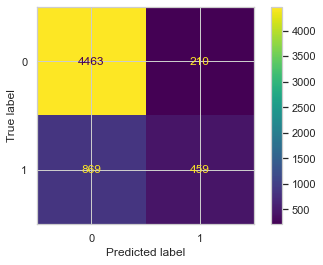

In [359]:
test_cm #ConfusionMatrixDisplay(confusion_matrix = base_cm)
disp = ConfusionMatrixDisplay(confusion_matrix = test_cm)
plt.grid()
disp.plot();

In [358]:
print(classification_report(y, y_preds, zero_division=1));

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      4673
           1       0.69      0.35      0.46      1328

    accuracy                           0.82      6001
   macro avg       0.76      0.65      0.68      6001
weighted avg       0.80      0.82      0.80      6001



In [ ]:
#Create a file with a model
pickle.dump(complete,open('classification_model.pkl','wb'))